---
## Lidar data

In [ ]:
  !pip install laspy

     |████████████████████████████████| 596 kB 557 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for laspy: filename=laspy-2.0.2-py3-none-any.whl size=49994 sha256=f60bd5736d4c5ac86226b283a8788db8ec78aea82a8eae75e53ffe79c79ceb50
  Stored in directory: /root/.cache/pip/wheels/42/76/f3/21f76ecfbe80f0fe5d16b32686302770120788f25f937c6a56
Successfully built laspy


In [ ]:
import laspy
lidar = laspy.read("/content/drive/MyDrive/HACKATHON/Known_Damage_Tiles/X161_Y113.las")

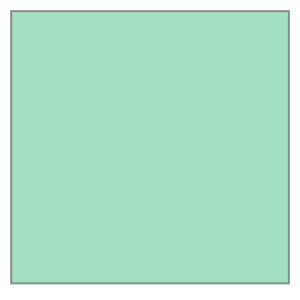

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon
lidar_space = Polygon([(np.max(lidar.x), np.max(lidar.y)), (np.max(lidar.x), np.min(lidar.y)), (np.min(lidar.x), np.min(lidar.y)), (np.min(lidar.x), np.max(lidar.y))])
lidar_space

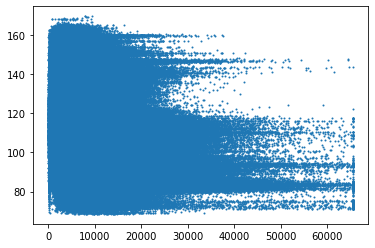

In [ ]:
plt.scatter(lidar.intensity, lidar.z, s=1)
plt.show()

In [ ]:
import numpy as np
# Grab the scaled x, y, and z dimensions and stick them together
# in an nx3 numpy array

coords = np.vstack((lidar.x, lidar.y, lidar.z)).transpose()

# Pull off the first point
first_point = coords[0,:]

# Calculate the euclidean distance from all points to the first point

distances = np.sum(np.sqrt((coords - first_point) ** 2), axis=1)

# Create an array of indicators for whether or not a point is less than
# 500000 units away from the first point

mask = distances < 20

# Grab an array of all points which meet this threshold

first_region = lidar[mask]


# Pull off the first point
second_point = coords[280000,:]

# Calculate the euclidean distance from all points to the first point

distances = np.sum(np.sqrt((coords - second_point) ** 2), axis=1)

# Create an array of indicators for whether or not a point is less than
# 500000 units away from the first point

mask = distances < 20

# Grab an array of all points which meet this threshold

second_region = lidar[mask]

print("We kept %i points in first region and %i in second region out of %i total" % (len(first_region), len(second_region), len(lidar.points)))

We kept 21008 points in first region and 14297 in second region out of 5876349 total


In [ ]:
type(mask)

numpy.ndarray

In [ ]:
for dimension in first_region.point_format.dimensions:
    print(dimension.name)

X
Y
Z
intensity
return_number
number_of_returns
scan_direction_flag
edge_of_flight_line
classification
synthetic
key_point
withheld
scan_angle_rank
user_data
point_source_id
gps_time
red
green
blue


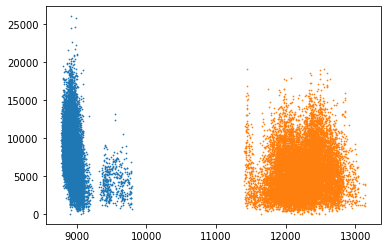

In [ ]:
plt.scatter(first_region.Z, first_region.intensity, s=0.5)
plt.scatter(second_region.Z, second_region.intensity, s=0.5)

plt.show()

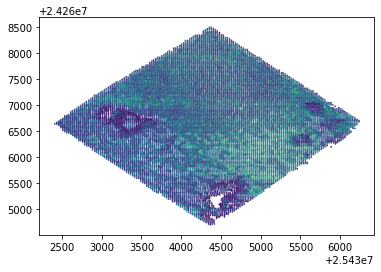

In [ ]:
plt.scatter(first_region.X, first_region.Y, c=first_region.intensity, s=0.5)
#plt.scatter(second_region.X, second_region.Y, c=second_region.intensity, s=0.5)

plt.show()

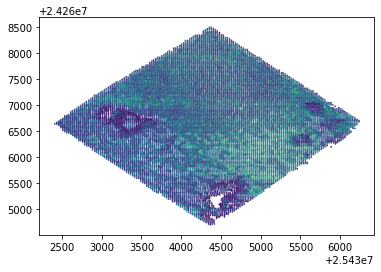

In [ ]:
plt.scatter(first_region.X, first_region.Y, c=first_region.intensity, s=0.5)
plt.show()

---
## Buildings footprints

In [ ]:
!pip install geopandas

     |████████████████████████████████| 994 kB 5.1 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.6 MB 31.3 MB/s 


In [ ]:
import geopandas as gpd
shapefile = gpd.read_file("/content/drive/MyDrive/HACKATHON/hotosm_pri_buildings_polygons_shp/hotosm_pri_buildings_polygons.shp")

In [ ]:
shapefile.head()

,osm_id,source,building,buildingma,buildingle,addrstreet,addrcity,addrhousen,addrfull,office,name,geometry
0,20885732.0,None,yes,None,None,None,None,None,None,None,Multipisos UPRRP,"POLYGON ((-66.04457 18.40265, -66.04374 18.402..."
1,20887004.0,None,university,None,None,None,None,None,None,None,Escuela de Arquitecura y Escuela de Bellas Artes,"POLYGON ((-66.04640 18.40216, -66.04640 18.402..."
2,20887047.0,None,university,None,None,None,None,None,None,None,Anexo Lic. Eugenio María de Hostos,"POLYGON ((-66.04833 18.40213, -66.04831 18.402..."
3,20887143.0,None,university,None,None,None,None,None,None,None,Teatro UPR,"POLYGON ((-66.04906 18.40255, -66.04903 18.402..."
4,20887609.0,None,school,None,None,None,None,None,None,None,Complejo Deportivo Cosme Beitía Sálamo,"POLYGON ((-66.04705 18.40773, -66.04624 18.407..."


In [ ]:
examples = shapefile.geometry[:10]
examples

0    POLYGON ((-66.04457 18.40265, -66.04374 18.402...
1    POLYGON ((-66.04640 18.40216, -66.04640 18.402...
2    POLYGON ((-66.04833 18.40213, -66.04831 18.402...
3    POLYGON ((-66.04906 18.40255, -66.04903 18.402...
4    POLYGON ((-66.04705 18.40773, -66.04624 18.407...
5    POLYGON ((-67.16832 18.36862, -67.16823 18.368...
6    POLYGON ((-67.16848 18.33472, -67.16843 18.334...
7    POLYGON ((-66.69891 18.16921, -66.69880 18.169...
8    POLYGON ((-66.09407 18.24182, -66.09400 18.241...
9    POLYGON ((-66.09479 18.24167, -66.09458 18.241...
Name: geometry, dtype: geometry

In [ ]:
examples = examples.to_crs(32161)

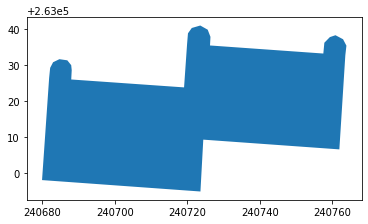

In [ ]:
examples[2:3].plot()

In [ ]:
examples[2:3].centroid.to_crs(4326)

2    POINT (-66.04794 18.40229)
dtype: geometry

Building centroid on [Google Maps](https://www.google.com.br/maps/place/18%C2%B024'08.2%22N+66%C2%B002'52.6%22W/@18.4022494,-66.0489189,387m/data=!3m1!1e3!4m5!3m4!1s0x0:0x0!8m2!3d18.40229!4d-66.04794)

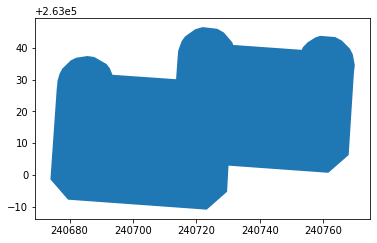

In [ ]:
examples[2:3].buffer(6, resolution=1).plot()

---
# Agr vai

In [ ]:
buildings = shapefile.geometry

In [ ]:
# buildings = shapefile.geometry.to_crs(32161).unary_union.intersection(lidar_space)

In [ ]:
buildings = buildings.to_crs(32161)

In [ ]:
buildings = buildings.intersection(lidar_space)

In [ ]:
builds_on_data = buildings[(buildings.is_empty)==False]

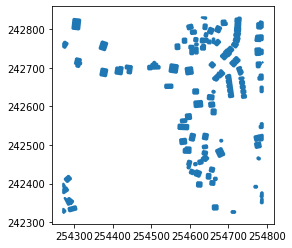

In [ ]:
builds_on_data.buffer(3, resolution=1).plot()

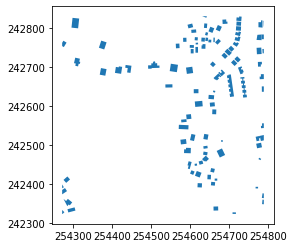

In [ ]:
builds_on_data.plot()

In [ ]:
coords = np.vstack((lidar.x, lidar.y)).transpose()
coords

array([[254343.6 , 242666.38],
       [254343.6 , 242666.38],
       [254343.6 , 242666.64],
       ...,
       [254444.19, 242416.2 ],
       [254444.11, 242416.51],
       [254444.22, 242416.49]])

In [ ]:
from shapely.geometry import Point
geopoints = gpd.GeoDataFrame(coords[:], columns=['x', 'y'])
#geopoints.apply(lambda x: Point(x))
geopoints['point'] = geopoints.apply(lambda i:Point(i.x, i.y), axis=1)
geopoints

,x,y,point
0,254343.60,242666.38,POINT (254343.6 242666.38)
1,254343.60,242666.38,POINT (254343.6 242666.38)
2,254343.60,242666.64,POINT (254343.6 242666.64)
3,254343.59,242666.64,POINT (254343.59 242666.64)
4,254343.59,242666.91,POINT (254343.59 242666.91)
...,...,...,...
5876344,254444.06,242416.30,POINT (254444.06 242416.3)
5876345,254444.20,242416.22,POINT (254444.2 242416.22)
5876346,254444.19,242416.20,POINT (254444.19 242416.2)
5876347,254444.11,242416.51,POINT (254444.11 242416.51)


In [ ]:
geopoints

,x,y,point
0,254343.60,242666.38,POINT (254343.6 242666.38)
1,254343.60,242666.38,POINT (254343.6 242666.38)
2,254343.60,242666.64,POINT (254343.6 242666.64)
3,254343.59,242666.64,POINT (254343.59 242666.64)
4,254343.59,242666.91,POINT (254343.59 242666.91)
...,...,...,...
5876344,254444.06,242416.30,POINT (254444.06 242416.3)
5876345,254444.20,242416.22,POINT (254444.2 242416.22)
5876346,254444.19,242416.20,POINT (254444.19 242416.2)
5876347,254444.11,242416.51,POINT (254444.11 242416.51)


In [ ]:
builds_on_data

442544     POLYGON ((254296.005 242801.944, 254298.706 24...
442545     POLYGON ((254272.070 242762.968, 254275.347 24...
442546     POLYGON ((254366.288 242750.431, 254372.340 24...
536813     POLYGON ((254285.644 242336.207, 254303.940 24...
597770     POLYGON ((254770.660 242750.142, 254782.685 24...
                                 ...                        
1150075    POLYGON ((254768.115 242389.564, 254768.114 24...
1150106    POLYGON ((254679.422 242509.581, 254679.834 24...
1150107    POLYGON ((254650.529 242609.324, 254662.837 24...
1150108    POLYGON ((254658.797 242636.753, 254659.917 24...
1150110    POLYGON ((254536.753 242656.309, 254554.744 24...
Length: 103, dtype: geometry

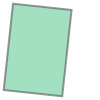

In [ ]:
builds_on_data[442544]

In [ ]:
geogeopoints = gpd.GeoSeries(geopoints.point)

In [ ]:
mask = np.array(geogeopoints.within(builds_on_data[442544]))
build1_pt = lidar[mask]

In [ ]:
mask = np.array(geogeopoints.within(builds_on_data[685650]))
build2_pt = lidar[mask]

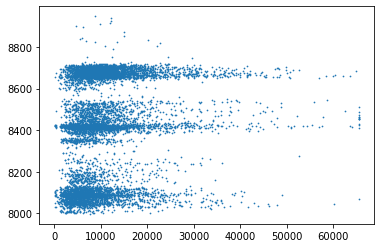

In [ ]:
plt.scatter(build1_pt.intensity, build1_pt.Z, s=0.5)
#plt.scatter(build2_pt.intensity, build2_pt.Z, s=0.5)
#plt.savefig()

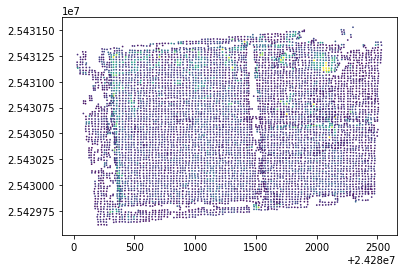

In [ ]:
plt.scatter(build1_pt.Y, build1_pt.X, c=build1_pt.intensity , s=0.5)

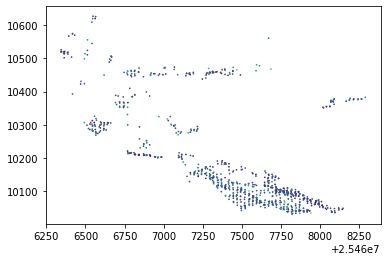

In [ ]:
plt.scatter(build2_pt.X, build2_pt.Z, c=build2_pt.intensity , s=0.5)

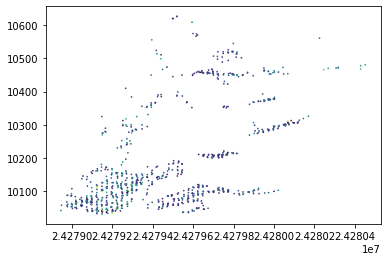

In [ ]:
plt.scatter(build2_pt.Y, build2_pt.Z, c=build2_pt.intensity , s=0.5)

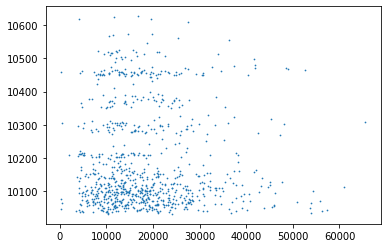

In [ ]:
plt.scatter(build2_pt.intensity, build2_pt.Z, s=0.5)

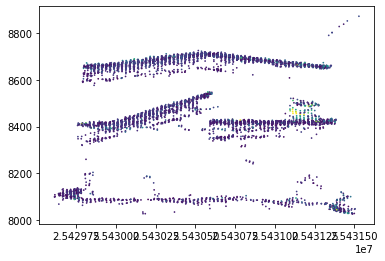

In [ ]:
plt.scatter(build1_pt.X, build1_pt.Z, c=build1_pt.intensity , s=0.5)

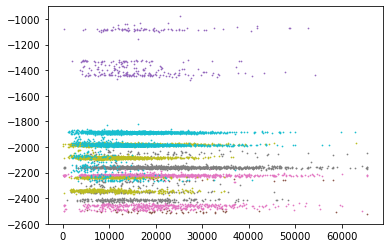

In [ ]:
for b in builds_on_data[45:55]:
  mask = np.array(geogeopoints.within(b))
  pt_build = lidar[mask]
  #floor = np.min(pt_build.Z)
  plt.scatter(pt_build.intensity, pt_build.Z-floor, s=0.5)


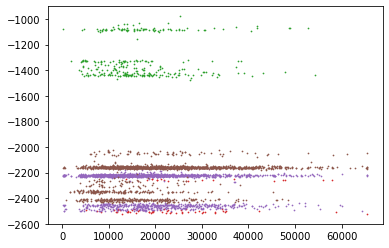

In [ ]:
pts_builds = []
for b in builds_on_data[47:53]:
  mask = np.array(geogeopoints.within(b))
  pts.builds.append(lidar[mask])
  #floor = np.min(pt_build.Z)
  plt.scatter(pt_build.intensity, pt_build.Z-floor, s=0.5)


In [ ]:
points_on_builds = lidar[np.array(geogeopoints.within(builds_on_data[:15].unary_union))]

In [ ]:
for i in builds_on_data.index:
  print(f'\n{i} : https://storms.ngs.noaa.gov/storms/maria/index.html#20/{builds_on_data.centroid.to_crs(4326).y[i]}/{builds_on_data.centroid.to_crs(4326).x[i]}')


442544 : https://storms.ngs.noaa.gov/storms/maria/index.html#20/18.219465161531613/-65.9199116730476

442545 : https://storms.ngs.noaa.gov/storms/maria/index.html#20/18.218986107554297/-65.92018999159221

442546 : https://storms.ngs.noaa.gov/storms/maria/index.html#20/18.218955050001686/-65.9192489000099

536813 : https://storms.ngs.noaa.gov/storms/maria/index.html#20/18.215137230466173/-65.92001858210888

597770 : https://storms.ngs.noaa.gov/storms/maria/index.html#20/18.21880849999821/-65.91545819999864

655461 : https://storms.ngs.noaa.gov/storms/maria/index.html#20/18.215449962135686/-65.91537391568713

655462 : https://storms.ngs.noaa.gov/storms/maria/index.html#20/18.215306604700874/-65.91537307300624

655463 : https://storms.ngs.noaa.gov/storms/maria/index.html#20/18.217400025643247/-65.91654950718775

655464 : https://storms.ngs.noaa.gov/storms/maria/index.html#20/18.2175853235368/-65.91692496182542

655465 : https://storms.ngs.noaa.gov/storms/maria/index.html#20/18.2168218500

685650    POINT (-65.91643 18.21934)
dtype: geometry

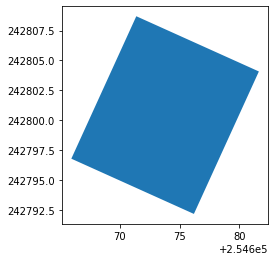

In [ ]:
builds_on_data[49:50].plot()
builds_on_data[49:50].centroid.to_crs(4326)

In [ ]:
print(builds_on_data[442544].centroid)

POINT (254305.8545234032 242813.5673370117)


In [ ]:
fromNAD83.transform(254305.8545234032, 242813.5673370117)

(18.219465161531613, -65.9199116730476)

In [ ]:
geogeopoints.within(builds_on_data[442544])

0          False
1          False
2          False
3          False
4          False
           ...  
5876344    False
5876345    False
5876346    False
5876347    False
5876348    False
Length: 5876349, dtype: bool

In [ ]:
shapefile.loc[442544]

osm_id                                               5.2813e+08
source                                                     None
building                                                    yes
buildingma                                                 None
buildingle                                                 None
addrstreet                                                 None
addrcity                                                   None
addrhousen                                                 None
addrfull                                                   None
office                                                     None
name                                                       None
geometry      POLYGON ((-65.9200051 18.2193604, -65.9199789 ...
Name: 442544, dtype: object

In [ ]:
geopoints = gpd.GeoSeries(points)


In [ ]:
geopoints

0      POINT (254343.600 242666.380)
1      POINT (254343.600 242666.380)
2      POINT (254343.600 242666.640)
3      POINT (254343.590 242666.640)
4      POINT (254343.590 242666.910)
                   ...              
995    POINT (254344.510 242691.160)
996    POINT (254344.560 242691.120)
997    POINT (254344.870 242666.410)
998    POINT (254344.870 242666.420)
999    POINT (254344.850 242666.670)
Length: 1000, dtype: geometry

In [ ]:
build1_pt = geopoints.whitin(builds_on_data[:1])

AttributeError: ignored

---
Coordinates convresion test


In [ ]:
!pip install pyproj

     |████████████████████████████████| 6.6 MB 5.0 MB/s 


In [ ]:
from pyproj import CRS
#Coordinate reference system from lidar data: (NAD83)
crs_32161 = CRS.from_epsg(32161)
#Coordinate reference system from shapefile: (WSG84/OpenStreetMap)
crs_3857 = CRS.from_epsg(3857)
crs_4326 = CRS.from_epsg(4326)
crs_4326

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
from pyproj import Transformer

toNAD83 = Transformer.from_crs(crs_4326, crs_32161)
toNAD83

<Concatenated Operation Transformer: pipeline>
Description: Ballpark geographic offset from WGS 84 to NAD83 + SPCS83 Puerto Rico & Virgin Islands zone (meters)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)

In [ ]:
toNAD83 = Transformer.from_crs(crs_3857.geodetic_crs, crs_32161)
toNAD83

<Concatenated Operation Transformer: pipeline>
Description: Ballpark geographic offset from WGS 84 to NAD83 + SPCS83 Puerto Rico & Virgin Islands zone (meters)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)

In [ ]:
fromNAD83 = Transformer.from_crs(crs_32161, crs_4326)
fromNAD83

<Concatenated Operation Transformer: pipeline>
Description: Inverse of SPCS83 Puerto Rico & Virgin Islands zone (meters) + Ballpark geographic offset from NAD83 to WGS 84
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)

In [ ]:
fromNAD83.transform(, 267160.852450876)

(18.439872899999994, -66.1225264)

In [ ]:
toNAD83.transform(18.4398729, -66.1225264) == (232833.42419774918, 267160.852450876)

True

In [ ]:
crs_3857.geodetic_crs == crs_4326

True

In [ ]:
toNAD83.transform([18.4398729, -66.1225264)


---



In [ ]:
!pip install pptk

In [ ]:
randlidarx = np.random.choice(lidar.x, 10000)
randlidary = np.random.choice(lidar.y, 10000)

In [ ]:
plt.plot(x, y)
plt.plot(randlidarx, randlidary, 'o')
plt.show()

In [ ]:
lidar.x[0]

254343.6

In [ ]:
lidar.y[0]

242666.38

In [ ]:
lidar.header.maxs

array([2.54789180e+05, 2.42831132e+05, 1.69611211e+02])

In [ ]:
for dimension in lidar.point_format.dimensions:
    print(dimension.name)

X
Y
Z
intensity
return_number
number_of_returns
scan_direction_flag
edge_of_flight_line
classification
synthetic
key_point
withheld
scan_angle_rank
user_data
point_source_id
gps_time
red
green
blue
